In [13]:
import sqlite3
import pandas as pd

# connect to SQLite
conn = sqlite3.connect("../db/seattle_airbnb.db")

# load calendar table
calendar = pd.read_sql("SELECT * FROM calendar", conn)
conn.close()

# quick view
print(calendar.shape)
calendar.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,None
3,241032,2016-01-07,f,None
4,241032,2016-01-08,f,None


In [14]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [15]:
calendar['price']=(
    calendar['price']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\elias\AppData\Local\Temp\ipykernel_33548\3450527011.py:3: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


In [16]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['date']

0         2016-01-04
1         2016-01-05
2         2016-01-06
3         2016-01-07
4         2016-01-08
             ...    
1393565   2016-12-29
1393566   2016-12-30
1393567   2016-12-31
1393568   2017-01-01
1393569   2017-01-02
Name: date, Length: 1393570, dtype: datetime64[ns]

In [17]:
calendar['available'].unique()

array(['t', 'f'], dtype=object)

In [18]:
print(calendar['available'].head(10))


0    t
1    t
2    f
3    f
4    f
5    f
6    f
7    f
8    f
9    t
Name: available, dtype: object


In [19]:
calendar['available'] = calendar['available'].map({'t': 1, 'f': 0})
print(calendar['available'].head(10))

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: available, dtype: int64


In [21]:
calendar['price'] = (
    calendar['price']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)
calendar['price'].describe()


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\elias\AppData\Local\Temp\ipykernel_33548\362758074.py:3: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

In [22]:
occupancy_rate = 1 - calendar['available'].mean()
print(f"Occupancy rate: {occupancy_rate:.2%}")

Occupancy rate: 32.94%


In [23]:
calendar['weekday'] = calendar['date'].dt.day_name()
calendar.groupby('weekday')['price'].mean().sort_values()

weekday
Tuesday      135.408764
Wednesday    135.447880
Monday       135.676414
Sunday       136.459941
Thursday     136.476032
Friday       143.036294
Saturday     143.202136
Name: price, dtype: float64

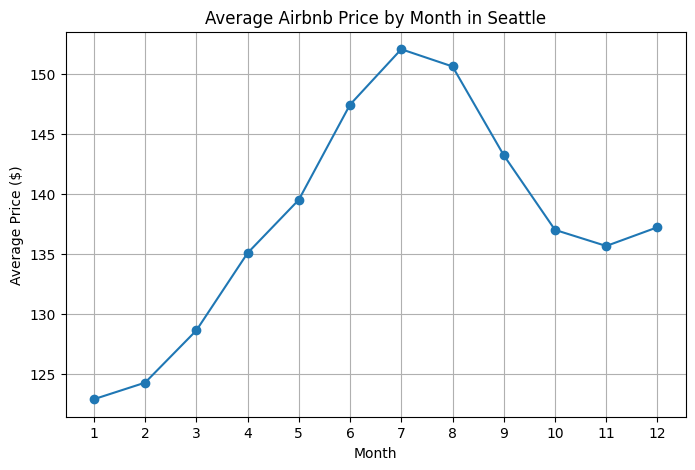

In [26]:
import matplotlib.pyplot as plt

# get average price per month
monthly_price = calendar.groupby('month')['price'].mean()

plt.figure(figsize=(8,5))
plt.plot(monthly_price.index, monthly_price.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Average Price ($)")
plt.title("Average Airbnb Price by Month in Seattle")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


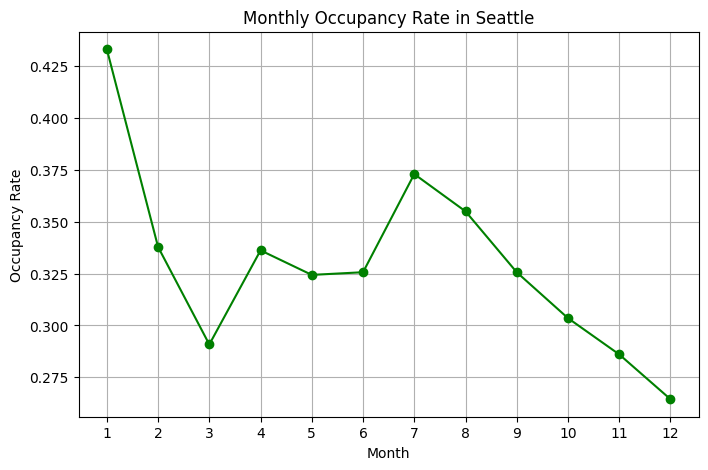

In [27]:
# calculate occupancy per month
monthly_occupancy = calendar.groupby('month')['available'].apply(lambda x: 1 - x.mean())

plt.figure(figsize=(8,5))
plt.plot(monthly_occupancy.index, monthly_occupancy.values, marker='o', color='green')
plt.xlabel("Month")
plt.ylabel("Occupancy Rate")
plt.title("Monthly Occupancy Rate in Seattle")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


In [28]:
calendar.to_csv("../data/processed/calendar_cleaned.csv", index=False)